<a href="https://colab.research.google.com/github/nissysathwika/Anamoly-detection/blob/main/Isolation_Forest_DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os


data = pd.read_csv('transaction.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [ ]:
data.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [ ]:
print(data.isnull().sum())
print(data.describe())

Timestamp          0
TransactionID      0
AccountID          0
Amount             0
Merchant           0
TransactionType    0
Location           0
dtype: int64
              Amount
count   76107.000000
mean    50141.400761
std     29403.049230
min        10.840000
25%     25053.575000
50%     50234.140000
75%     75098.465000
max    978942.260000


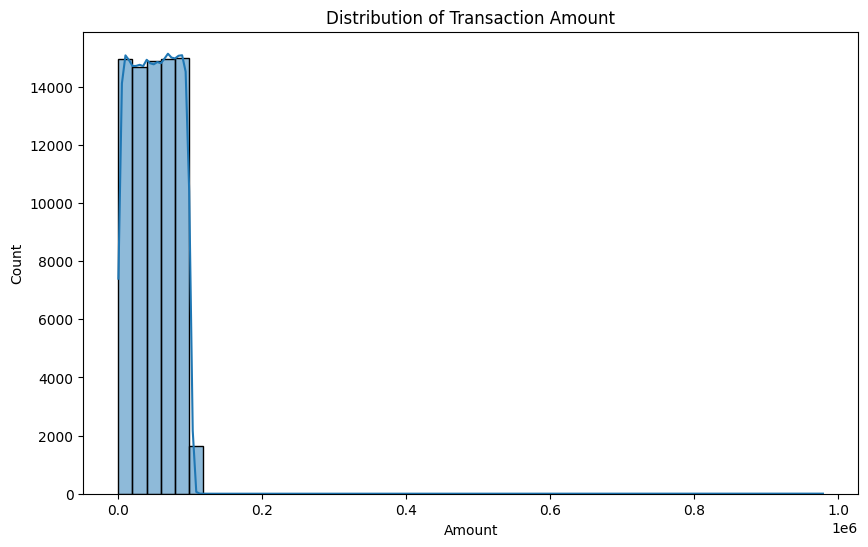

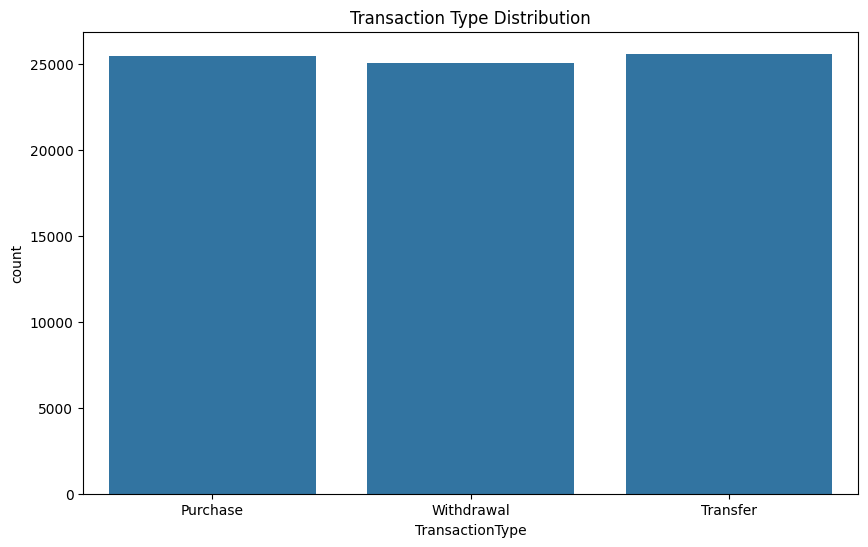

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

# Visualize Transaction Type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionType', data=data)
plt.title('Transaction Type Distribution')
plt.show()

In [ ]:
print(data.isnull().sum())

Timestamp          0
TransactionID      0
AccountID          0
Amount             0
Merchant           0
TransactionType    0
Location           0
dtype: int64


In [ ]:
print(data.columns)

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')


In [ ]:
# Convert Timestamp to datetime with the correct format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')

# Use OneHotEncoder for categorical variables
# sparse=False has been replaced by sparse_output=False
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = encoder.fit_transform(data[['Merchant', 'TransactionType', 'Location']])
feature_names = encoder.get_feature_names_out(['Merchant', 'TransactionType', 'Location'])
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

In [ ]:
print(data.columns)

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')


In [ ]:
print(data.columns
)

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')


In [ ]:
# Fit Isolation Forest model
model = IsolationForest(contamination=0.2, random_state=42)

# Concatenate the 'Amount' column from data with encoded_df
combined_data = pd.concat([data[['Amount']], encoded_df], axis=1)

# Fit the model with the combined data
model.fit(combined_data)

IsolationForest(contamination=0.2, random_state=42)

In [ ]:
# Predict anomalies (1 for normal, -1 for anomalies)
data['Anomaly'] = model.predict(pd.concat([data[['Amount']], encoded_df], axis=1)) # Use the same combined dataset used during training for prediction.

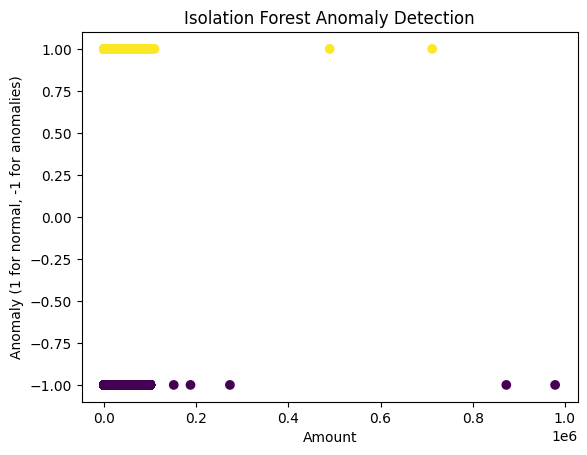

In [ ]:
# Scatter plot with decision boundaries
plt.scatter(data['Amount'], data['Anomaly'], c=data['Anomaly'], cmap='viridis')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Amount')
plt.ylabel('Anomaly (1 for normal, -1 for anomalies)')
plt.show()

In [ ]:
anomaly_counts = data['Anomaly'].value_counts()
print("Normal transactions:", anomaly_counts[1])
print("Anomalous transactions:", anomaly_counts[-1])


Normal transactions: 60892
Anomalous transactions: 15215


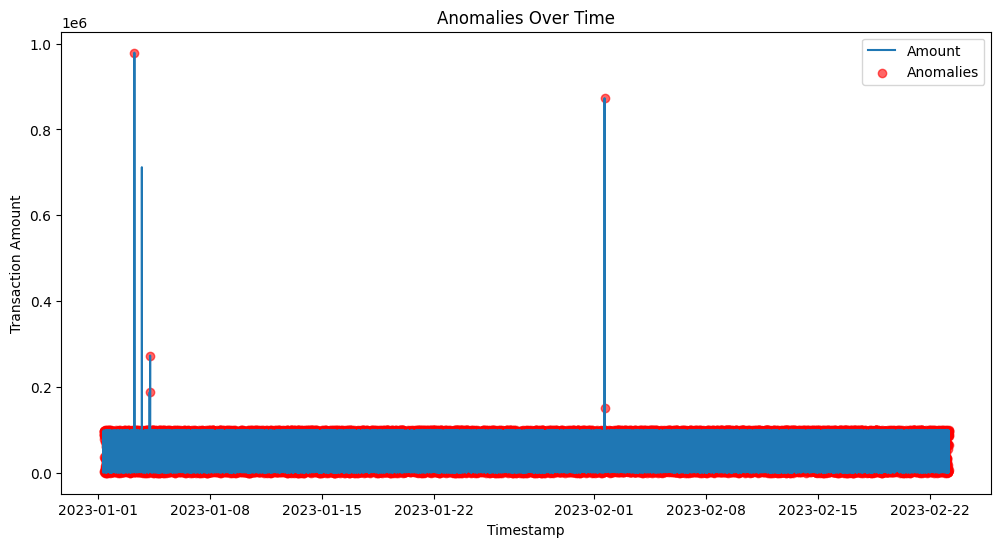

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['Amount'], label='Amount')
plt.scatter(data[data['Anomaly'] == -1]['Timestamp'], data[data['Anomaly'] == -1]['Amount'],
            color='red', label='Anomalies', alpha=0.6)
plt.title('Anomalies Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


Normal transactions: 60892
Anomalous transactions: 15215


<ipython-input-136-6ba821e28267>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly', data=data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


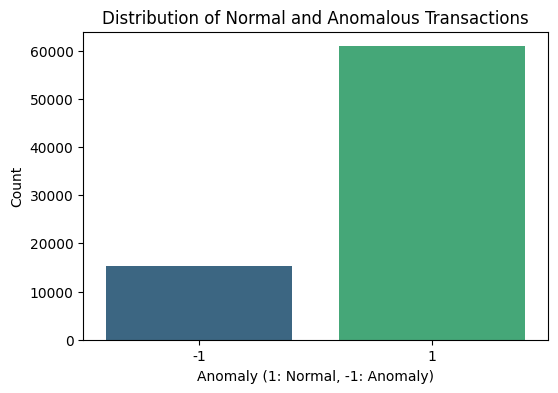

In [ ]:
# Count the number of normal and anomalous transactions
anomaly_counts = data['Anomaly'].value_counts()
print("Normal transactions:", anomaly_counts[1])
print("Anomalous transactions:", anomaly_counts[-1])

# Plot the distribution of normal vs anomalous transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Anomaly', data=data, palette='viridis')
plt.title('Distribution of Normal and Anomalous Transactions')
plt.xlabel('Anomaly (1: Normal, -1: Anomaly)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Print or inspect the anomalous transactions
anomalies = data[data['Anomaly'] == -1]
print(anomalies.head())

# Save the anomalies to a CSV file for further manual analysis
anomalies.to_csv('anomalous_transactions.csv', index=False)


             Timestamp TransactionID AccountID    Amount   Merchant  \
0  2023-01-01 08:00:00       TXN1127      ACC4  95071.92  MerchantH   
6  2023-01-01 08:06:00        TXN832      ACC9   4654.58  MerchantC   
7  2023-01-01 08:07:00        TXN841      ACC7   1336.36  MerchantI   
18 2023-01-01 08:18:00         TXN41     ACC12  86311.71  MerchantH   
24 2023-01-01 08:24:00       TXN1021      ACC4  90757.57  MerchantG   

   TransactionType       Location  Anomaly  
0         Purchase          Tokyo       -1  
6         Transfer          Tokyo       -1  
7       Withdrawal  San Francisco       -1  
18      Withdrawal       New York       -1  
24        Transfer          Tokyo       -1  


In [ ]:
# Tune contamination and max_samples
model = IsolationForest(contamination=0.1, max_samples=100, random_state=42)
# Fit the model using the 'Amount' column from the 'data' DataFrame
model.fit(data[['Amount']])
# Predict anomalies using the 'Amount' column from the 'data' DataFrame
data['Anomaly'] = model.predict(data[['Amount']])

In [ ]:
# Inspect the first few anomalous transactions
anomalies = data[data['Anomaly'] == -1]  # -1 indicates anomalies
print(anomalies.head())


            Timestamp TransactionID AccountID    Amount   Merchant  \
0 2023-01-01 08:00:00       TXN1127      ACC4  95071.92  MerchantH   
3 2023-01-01 08:03:00       TXN1438      ACC6     87.87  MerchantE   
4 2023-01-01 08:04:00       TXN1338      ACC6    716.56  MerchantI   
6 2023-01-01 08:06:00        TXN832      ACC9   4654.58  MerchantC   
7 2023-01-01 08:07:00        TXN841      ACC7   1336.36  MerchantI   

  TransactionType       Location  Anomaly  
0        Purchase          Tokyo       -1  
3        Purchase         London       -1  
4        Purchase    Los Angeles       -1  
6        Transfer          Tokyo       -1  
7      Withdrawal  San Francisco       -1  


In [ ]:
# Save anomalies to a CSV file
anomalies.to_csv('anomalous_transactions.csv', index=False)


In [ ]:
print(data.columns)

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location', 'Anomaly'],
      dtype='object')


                           Timestamp         Amount  Anomaly
count                           7600    7600.000000   7600.0
mean   2023-01-27 23:47:11.471052544   51935.864214     -1.0
min              2023-01-01 08:00:00      10.840000     -1.0
25%              2023-01-14 17:04:15    2495.255000     -1.0
50%              2023-01-27 23:53:00   95051.065000     -1.0
75%              2023-02-10 06:54:15   97524.037500     -1.0
max              2023-02-23 04:21:00  978942.260000     -1.0
std                              NaN   50497.109875      0.0


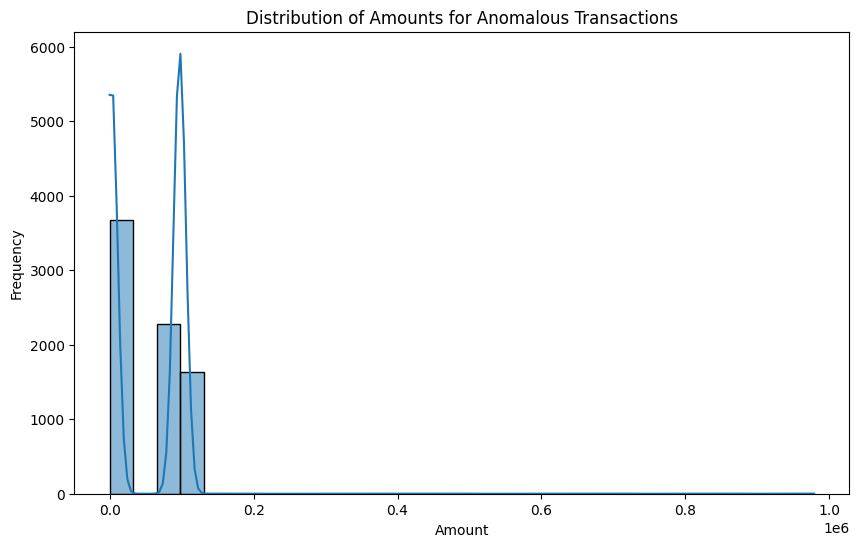

In [ ]:
# Get descriptive statistics for anomalous transactions
print(anomalies.describe())

# Visualize the distribution of amounts for anomalies
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(anomalies['Amount'], bins=30, kde=True)
plt.title('Distribution of Amounts for Anomalous Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


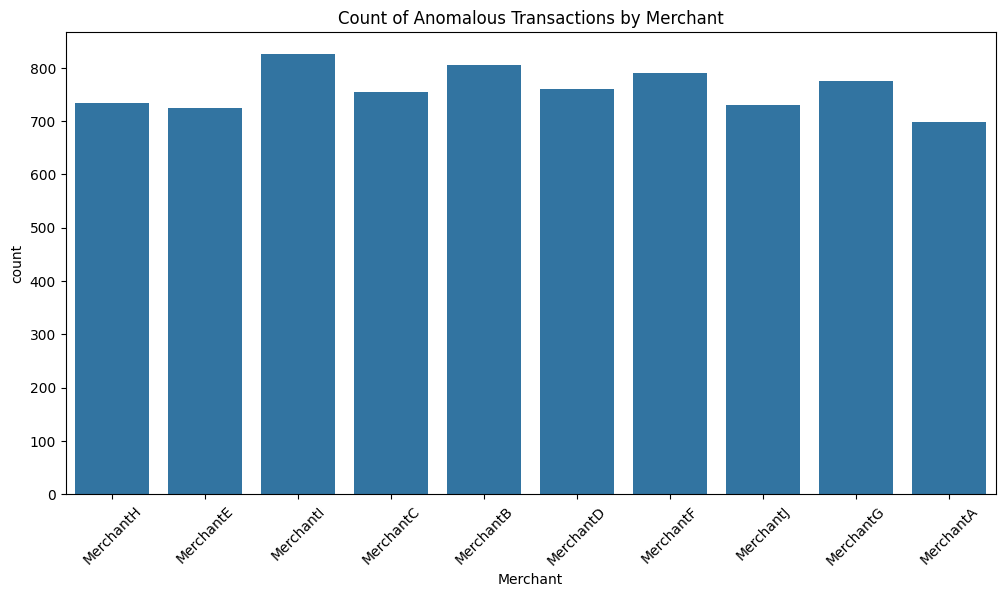

In [ ]:
# Countplot for anomalies by Merchant
plt.figure(figsize=(12, 6))
sns.countplot(data=anomalies, x='Merchant')
plt.title('Count of Anomalous Transactions by Merchant')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(data.columns)

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location', 'Anomaly'],
      dtype='object')


In [ ]:
# Example: View top 10 anomalies with the highest amounts
top_anomalies = anomalies.nlargest(10, 'Amount')
print(top_anomalies)


                Timestamp TransactionID AccountID     Amount   Merchant  \
2775  2023-01-03 06:15:00       TXN1049     ACC14  978942.26  MerchantJ   
45100 2023-02-01 15:40:00        TXN190      ACC5  873004.79  MerchantI   
3448  2023-01-03 17:28:00        TXN827     ACC12  712076.97  MerchantA   
3453  2023-01-03 17:33:00       TXN1690      ACC8  489492.30  MerchantF   
4194  2023-01-04 05:54:00        TXN667      ACC3  272990.11  MerchantE   
4148  2023-01-04 05:08:00        TXN625      ACC1  187344.37  MerchantD   
45099 2023-02-01 15:39:00       TXN1359     ACC11  151020.55  MerchantB   
45108 2023-02-01 15:48:00       TXN1660      ACC8  109150.02  MerchantF   
69536 2023-02-18 14:56:00        TXN165     ACC12   99998.81  MerchantH   
22433 2023-01-16 21:53:00       TXN1148      ACC8   99997.60  MerchantC   

      TransactionType       Location  Anomaly  
2775         Transfer       New York       -1  
45100      Withdrawal    Los Angeles       -1  
3448       Withdrawal         

In [ ]:
# Example: Extracting date/time features
data['Transaction_Date'] = pd.to_datetime(data['Timestamp']).dt.date
data['Transaction_Hour'] = pd.to_datetime(data['Timestamp']).dt.hour


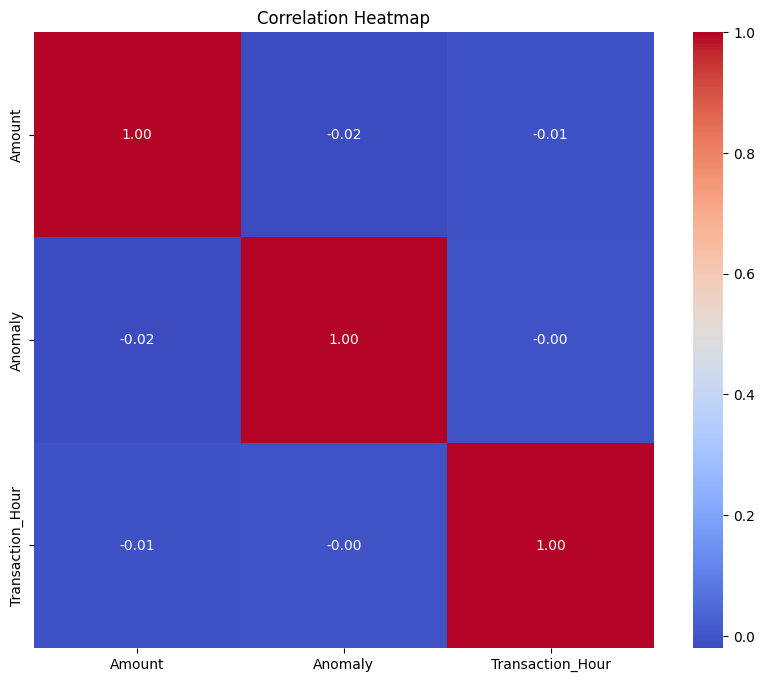

In [ ]:
# Example: Correlation heatmap
plt.figure(figsize=(10, 8))
# Include only numerical features for correlation analysis
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Example: Group by Merchant to see the count of anomalies
merchant_anomaly_counts = anomalies.groupby('Merchant').size()
print(merchant_anomaly_counts)


Merchant
MerchantA    698
MerchantB    806
MerchantC    754
MerchantD    761
MerchantE    725
MerchantF    791
MerchantG    775
MerchantH    734
MerchantI    826
MerchantJ    730
dtype: int64


In [ ]:
print(f"Total number of anomalies: {len(anomalies)}")

Total number of anomalies: 7600


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import IsolationForest
# Example: Cross-validation on the Isolation Forest model
# Define a custom scorer function for IsolationForest
def scorer(estimator, X):
  return np.mean(estimator.score_samples(X))

scores = cross_val_score(model, data[['Amount']], scoring=scorer, cv=5) # Use a custom scorer
print("Cross-validation scores:", scores)

Cross-validation scores: [-0.51699941 -0.51760012 -0.51928122 -0.51907538 -0.51960918]


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7600
           1       1.00      1.00      1.00     68507

    accuracy                           1.00     76107
   macro avg       1.00      1.00      1.00     76107
weighted avg       1.00      1.00      1.00     76107



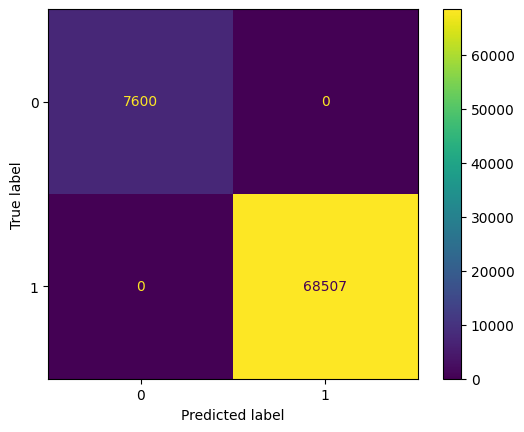

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'model' is your trained anomaly detection model
data['Predicted_Label'] = model.predict(data[['Amount']]) # Generate predictions and assign to 'Predicted_Label' column

# Print classification report
print(classification_report(data['Anomaly'], data['Predicted_Label']))

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(data['Anomaly'], data['Predicted_Label'])
ConfusionMatrixDisplay(cm).plot()
plt.show()

              precision    recall  f1-score   support

          -1       0.29      0.29      0.29      7600
           1       0.92      0.92      0.92     68507

    accuracy                           0.86     76107
   macro avg       0.61      0.61      0.61     76107
weighted avg       0.86      0.86      0.86     76107

Accuracy: 0.86


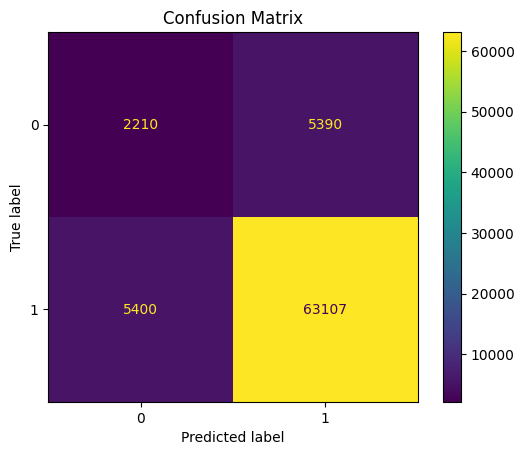

In [ ]:
# Fit the model once
model.fit(combined_data)  # Fit on the combined features
data['Predicted_Label'] = model.predict(combined_data)  # Get predictions

# Map labels: 1 for normal, -1 for anomalies
data['Predicted_Label'] = data['Predicted_Label'].map({1: 1, -1: -1})

# Print classification report
print(classification_report(data['Anomaly'], data['Predicted_Label']))

# Calculate accuracy
accuracy = accuracy_score(data['Anomaly'], data['Predicted_Label'])
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(data['Anomaly'], data['Predicted_Label'])
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming your data DataFrame has 'Anomaly' and 'Predicted_Label' columns
correct_predictions = (data['Anomaly'] == data['Predicted_Label']).sum()
total_predictions = data.shape[0]

# Calculate accuracy
accuracy = accuracy_score(data['Anomaly'], data['Predicted_Label'])
print(f"Accuracy: {accuracy:.2f}")

# Alternatively, manually calculate accuracy
print(f"Manual Accuracy: {correct_predictions / total_predictions:.2f}")

Accuracy: 0.86
Manual Accuracy: 0.86
